In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
file_path = 'IoT Network Intrusion Dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)
# Display the first few rows
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

                                     Flow_ID           Src_IP  Src_Port  \
0   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1    192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2     192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3     192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4  192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   

            Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0     192.168.0.16     10101        17  25/07/2019 03:25:53 AM             75   
1     192.168.0.13       554         6  26/05/2019 10:11:06 PM           5310   
2     192.168.0.13      9020         6  11/07/2019 01:24:48 AM            141   
3     192.168.0.13      9020         6  04/09/2019 03:58:17 AM            151   
4  239.255.255.250      1900        17  10/09/2019 01:41:18 AM            153   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  Active_Max  Ac

c:\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


            Src_Port       Dst_Port       Protocol  Flow_Duration  \
count  625783.000000  625783.000000  625783.000000  625783.000000   
mean    35026.156190   16387.027479       9.971436     635.422865   
std     24721.047752   17550.363037       5.379857    3496.740723   
min         0.000000       0.000000       0.000000       0.000000   
25%      9020.000000    8899.000000       6.000000      76.000000   
50%     51991.000000    9020.000000       6.000000     132.000000   
75%     56361.000000   10101.000000      17.000000     221.000000   
max     65500.000000   65371.000000      17.000000   99984.000000   

        Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  \
count  625783.000000  625783.00000    625783.000000    625783.000000   
mean        1.675566       1.46853       570.738980       929.280973   
std         4.309970       1.21949      1161.873195      1731.760875   
min         0.000000       1.00000         0.000000         0.000000   
25%         0.0000

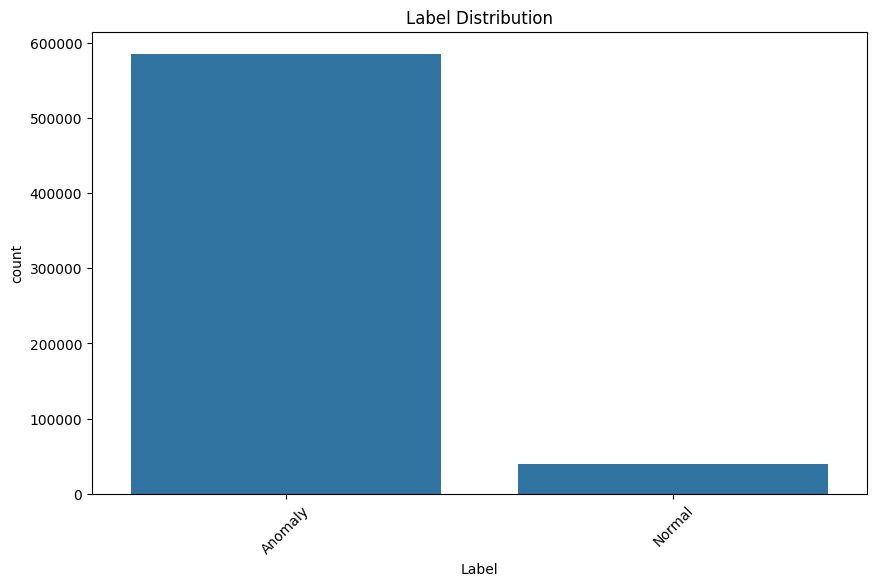

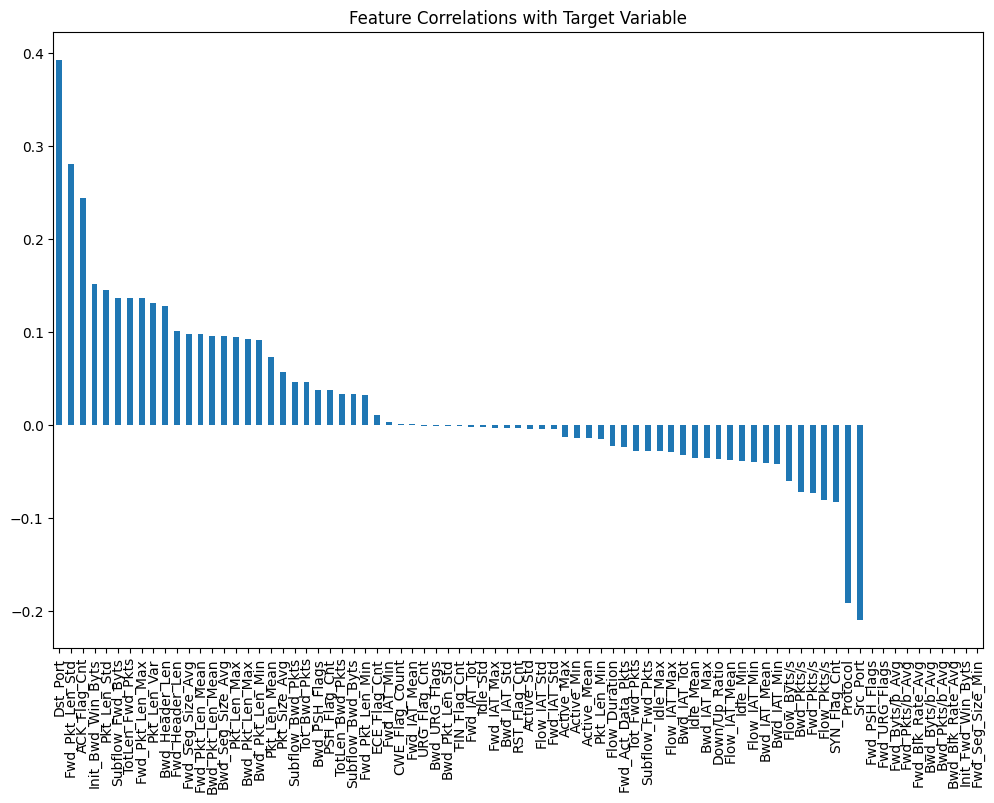

In [3]:
# Drop non-numeric columns
data = data.drop(columns=['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Cat', 'Sub_Cat'])

# Label Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=data)
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

# Encode the target variable
data['Label'] = data['Label'].astype('category').cat.codes

# Compute the correlation with the target variable
correlations = data.corr()['Label'].drop('Label').sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 8))
correlations.plot(kind='bar')
plt.title('Feature Correlations with Target Variable')
plt.show()

In [4]:
# Select the top 20 features based on correlation
top_features = correlations.index[:20]
X = data[top_features]
y = data['Label']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the performance metrics
performance_metrics = {}

In [7]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Store the performance metrics
    performance_metrics[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

# Print the performance metrics for each model
for model_name, metrics in performance_metrics.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.9460249820225317
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    175740
           1       0.64      0.36      0.46     11995

    accuracy                           0.95    187735
   macro avg       0.80      0.67      0.71    187735
weighted avg       0.94      0.95      0.94    187735

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.9942631901350307
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    175740
           1       0.99      0.92      0.95     11995

    accuracy                           0.99    187735
   macro avg       0.99      0.96      0.98    187735
weighted avg       0.99      0.99      0.99    187735

------------------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.9766585879031614
Classificatio